### Someting

``
Esto es codigo 
escirto``

In [3]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib

In [45]:
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
df = pd.read_csv("demo_ventas.csv")

In [46]:
df

,Date,Amount
0,1/1/2020,497
1,1/2/2020,145
2,1/3/2020,413
3,1/4/2020,488
4,1/5/2020,366
5,1/6/2020,102
6,1/7/2020,464
7,1/8/2020,154
8,1/9/2020,270
9,1/10/2020,236


In [29]:
df.dtypes

Date      object
Amount     int64
dtype: object

In [33]:
date = pd.to_datetime(df["Date"]) 
df["Date"] = date
df.dtypes

Date      datetime64[ns]
Amount             int64
dtype: object

In [71]:
df.sort_index(inplace=True)

In [72]:

y = df.set_index(['Date'])

In [73]:
y.head(5)

,Amount
Date,
1/1/2020,497
1/2/2020,145
1/3/2020,413
1/4/2020,488
1/5/2020,366


In [49]:
y

,Amount
Date,
2020-01-01,497
2020-01-02,145
2020-01-03,413
2020-01-04,488
2020-01-05,366
2020-01-06,102
2020-01-07,464
2020-01-08,154
2020-01-09,270


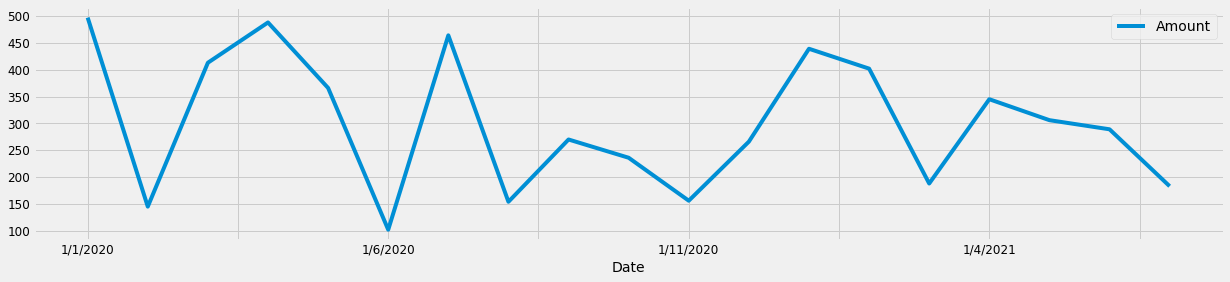

In [74]:
y.plot(figsize = (19, 4))
plt.show()

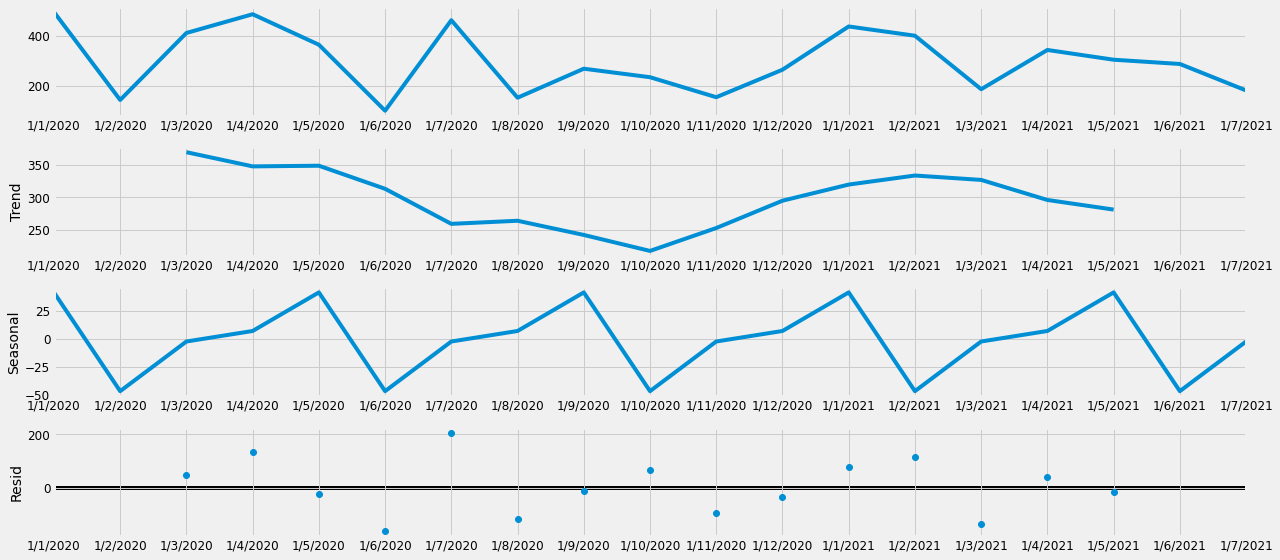

In [77]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose( y, model='additive', period=4)
fig = decomposition.plot()
plt.show()

In [78]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter for SARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter for SARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [79]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param,param_seasonal,results.aic))
        except: 
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:259.8703937906727
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:88.81912273052777
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:82.96265614829548
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:4.0
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:94.88004295204911
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:84.53318094706529
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:4.0
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:6.0
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:238.89338171565518
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:71.17602676695356
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:69.41810631504605
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:6.0
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:93.87253265822815
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:69.07624451304144
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:6.0
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:8.0
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:226.3754473531143
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:66.73148575811572
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:74.00720666515222
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:4

ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:4.0

In [148]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(0, 0, 1),
                                seasonal_order=(0, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.6043      0.282      2.146      0.032       0.052       1.156
sigma2       5.73e+04   2.77e+04      2.067      0.039    2959.337    1.12e+05


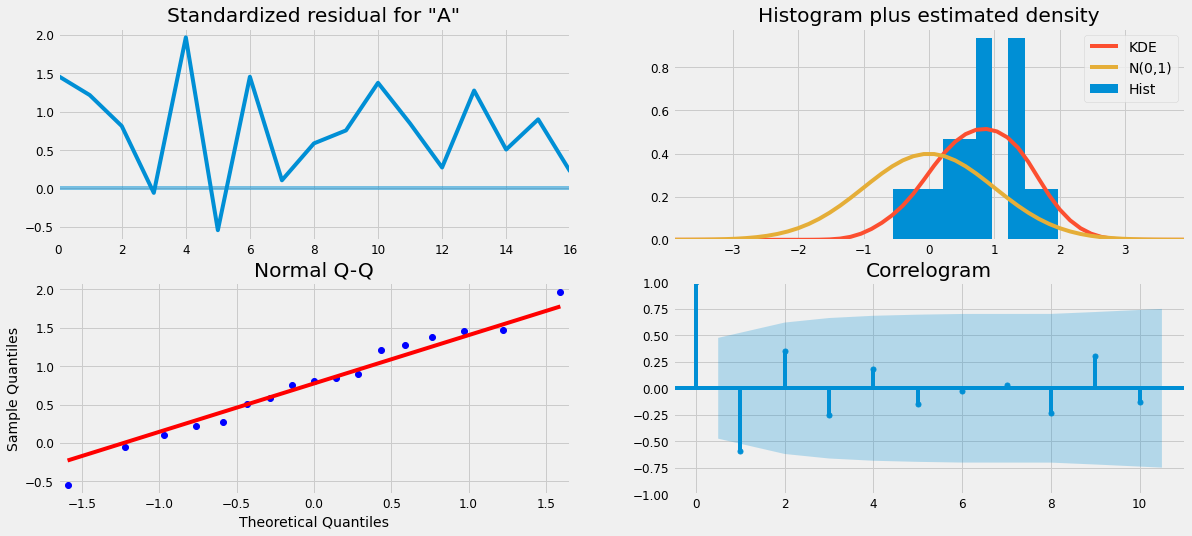

In [149]:
results.plot_diagnostics(figsize=(18, 8))
plt.show()

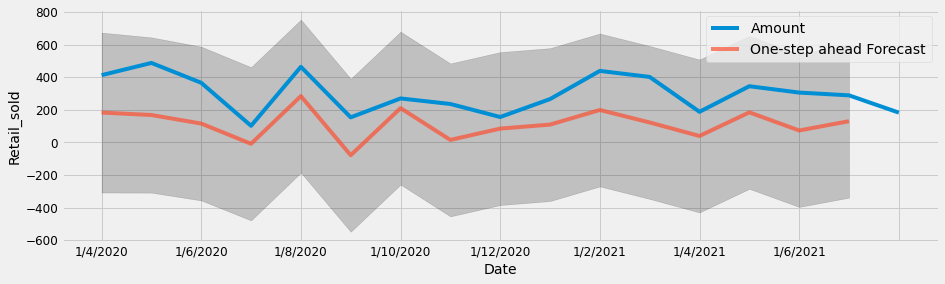

In [162]:
pred = results.get_prediction(start='1/4/2020', dynamic=False)
pred_ci = pred.conf_int()
ax = y['1/3/2020':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 4))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Retail_sold')
plt.legend()
plt.show()

In [164]:
y_forecasted = pred.predicted_mean
y_truth = y['1/4/2020':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error is 1/1/2021    NaN
1/10/2020   NaN
1/11/2020   NaN
1/12/2020   NaN
1/2/2021    NaN
1/3/2021    NaN
1/4/2020    NaN
1/4/2021    NaN
1/5/2020    NaN
1/5/2021    NaN
1/6/2020    NaN
1/6/2021    NaN
1/7/2020    NaN
1/7/2021    NaN
1/8/2020    NaN
1/9/2020    NaN
Amount      NaN
dtype: float64
The Root Mean Squared Error is 1/1/2021    NaN
1/10/2020   NaN
1/11/2020   NaN
1/12/2020   NaN
1/2/2021    NaN
1/3/2021    NaN
1/4/2020    NaN
1/4/2021    NaN
1/5/2020    NaN
1/5/2021    NaN
1/6/2020    NaN
1/6/2021    NaN
1/7/2020    NaN
1/7/2021    NaN
1/8/2020    NaN
1/9/2020    NaN
Amount      NaN
dtype: float64


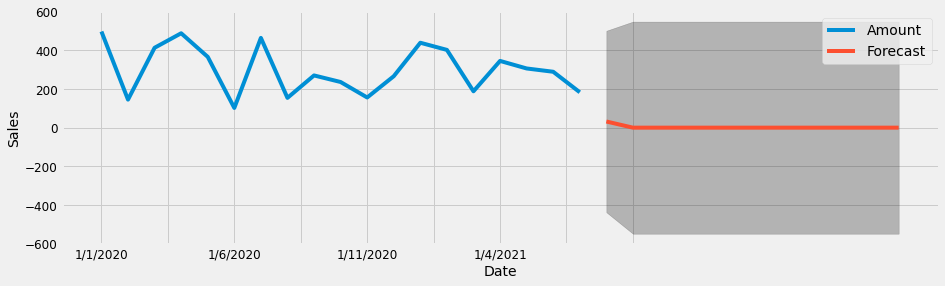

In [165]:
pred_uc = results.get_forecast(steps=12)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 4))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.show()